<a href="https://colab.research.google.com/github/JibrilTheUltimateFlugel/TensorflowTest/blob/main/TensorflowCNNfromScratchVer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plot
from keras.datasets import cifar10

In [2]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print(train_img.shape)
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
train_img = train_img/255.0
test_img = test_img/255.0

In [7]:
#Ver 2.0 Using tf.data.Dataset and batching as well as shuffling
train_dataset = tf.data.Dataset.from_tensor_slices((train_img,train_lab))
train_dataset = train_dataset.shuffle(50000).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_img,test_lab))
test_dataset = test_dataset.shuffle(10000).batch(32)

In [8]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [20]:
#Now use the datasets to fit to the model!
history = model.fit(train_dataset,epochs=100,validation_data=(test_dataset))
model.save('cnnfromscratch.h5')

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6270 - accuracy: 0.7806 - val_loss: 0.8022 - val_accuracy: 0.7217
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6047 - accuracy: 0.7883 - val_loss: 0.8179 - val_accuracy: 0.7208
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5828 - accuracy: 0.7943 - val_loss: 0.8160 - val_accuracy: 0.7293
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5601 - accuracy: 0.8029 - val_loss: 0.8160 - val_accuracy: 0.7310
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5424 - accuracy: 0.8069 - val_loss: 0.8006 - val_accuracy: 0.7385
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5223 - accuracy: 0.8149 - val_loss: 0.8051 - val_accuracy: 0.7353
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5135 - accuracy: 0.8170 - val_loss: 0.8198 - val_ac

In [21]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plot.subplot(211)
	plot.title('Cross Entropy Loss')
	plot.plot(history.history['loss'], color='blue', label='train')
	plot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plot.subplot(212)
	plot.title('Classification Accuracy')
	plot.plot(history.history['accuracy'], color='blue', label='train')
	plot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	#filename = sys.argv[0].split('/')[-1]
	#pyplot.savefig(filename + '_plot.png')
	#pyplot.close()

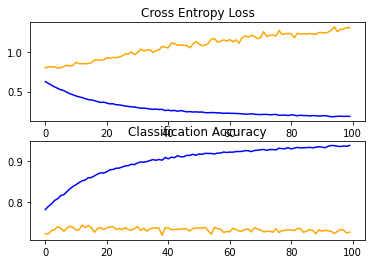

In [22]:
summarize_diagnostics(history)

In [23]:
#Evaluating the model with training dataset
loss, accuracy = model.evaluate(train_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

1563/1563 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9926
Loss: 0.034263063222169876
Accuracy: 0.9926000237464905


In [24]:
#Evaluating the model with testing dataset
loss, accuracy = model.evaluate(test_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.3175 - accuracy: 0.7252
Loss: 1.3174748420715332
Accuracy: 0.7251999974250793


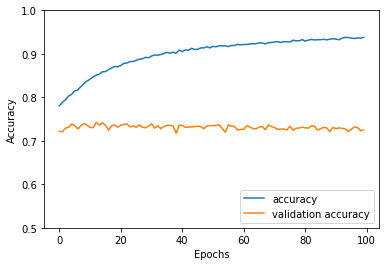

In [25]:
plot.plot(history.history['accuracy'], label='accuracy') 
plot.plot(history.history['val_accuracy'], label='validation accuracy')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.ylim([0.5,1])
plot.legend(loc = 'lower right')

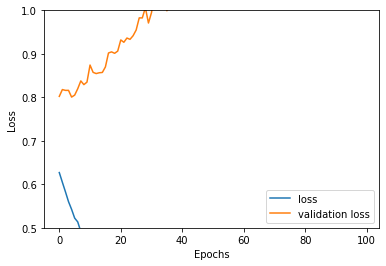

In [26]:
plot.plot(history.history['loss'], label='loss') 
plot.plot(history.history['val_loss'], label='validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.ylim([0.5,1])
plot.legend(loc = 'lower right')